In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

## データセットの作成

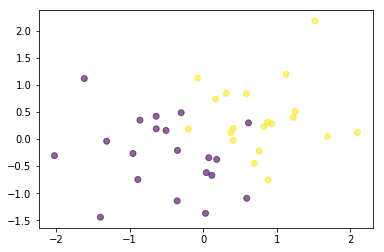

In [24]:
n=40;
np.random.seed(1)
omega = np.random.randn(1,1);
noise = 0.8 * np.random.randn(n,1);
feature = np.random.randn(n,2);
df=pd.DataFrame(feature, columns=['x','y'])
df1=pd.DataFrame(noise, columns=['z'])
df= pd.concat([df,df1],axis=1)
df['c']=df.apply(lambda row :1 if(omega * row.x + row.y + row.z)>0 else -1, axis=1)
plt.scatter(x=df.x, y=df.y, c=df.c, alpha=0.6)

## 使う関数を定義する

In [20]:
#確率を返す関数
def get_prob(x, y, w):
    feature_vector=np.array([x,y,1])
    z=np.inner(feature_vector,w)
    return 1.0/(1 + np.exp(-z))

#L2正則化ロジスティック損失関数
def J(w,r):
    likelihood=0
    for x, y, c in zip(df.x, df.y, df.c):
        i_likelihood = np.log(1+np.exp(-c*np.inner(np.array([x,y,1]),w)))
        likelihood = likelihood + i_likelihood
    return likelihood+r*np.inner(w,w)

#J(w)、L2正則化ロジスティック回帰の対数尤度関数の一回微分
def J1(w,r):
    likelihood=0
    for x, y, c in zip(df.x, df.y, df.c):
        if c==1:
            prob = get_prob(x, y, w)  
        else: 
            prob = 1.0-get_prob(x, y, w)
        i_likelihood = -c*np.array([x,y,1])*(1-prob)
        likelihood = likelihood + i_likelihood
    return likelihood+2*r*w

def J2(w,r):
    likelihood=np.zeros((3,3))
    I = np.eye(3)
    for x, y, c in zip(df.x, df.y, df.c):
        X = np.array([x,y,1])
        Y = np.c_[X]
        if c==1:
            prob = get_prob(x, y, w)  
        else: 
            prob = 1.0-get_prob(x, y, w)
        i_likelihood =  prob*(1-prob)*X*Y
        likelihood = likelihood + i_likelihood
    return likelihood + 2*r*I

In [21]:
def newton_method(init_w,iteration,stepsize,regularization):
    w=np.array(init_w)
    r=regularization
    loss = J(w,r)
    loss_hist = [loss]
    for i in range(iteration):
        w = w -(stepsize * np.dot(np.linalg.inv(J2(w,r)),J1(w,r)))
        loss = J(w,r)
        loss_hist.append(loss)
    return (loss_hist)

# 実行して損失関数のグラフを書く

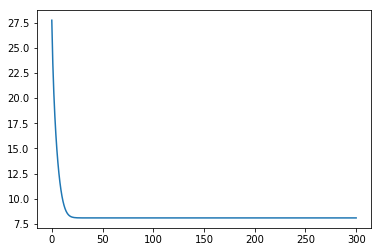

In [23]:
plt.plot(newton_method([0,0,0],300,0.2,0.01))